In [39]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np

In [16]:
#load audio files
audio_1='/Users/caomi/Documents/deep learning/audio signal processing/audio_files/Percussion/bass drum/bass-drum__phrase_mezzo-piano_rhythm.mp3'
audio_2='/Users/caomi/Documents/deep learning/audio signal processing/audio_files/Strings/guitar/guitar_Gs3_very-long_forte_normal.mp3'
audio_3='/Users/caomi/Documents/deep learning/audio signal processing/audio_files/Brass/trombone/trombone_Gs5_long_forte_vibrato.mp3'

In [8]:
ipd.Audio(audio_1)

In [17]:
ipd.Audio(audio_2)

In [18]:
ipd.Audio(audio_3)

In [19]:
audio_file1, sr1 =librosa.load(audio_1)
audio_file2, sr2 =librosa.load(audio_2)
audio_file3, sr3 =librosa.load(audio_3)

In [10]:
audio_file1

array([5.2386895e-10, 5.8207661e-11, 1.1641532e-10, ..., 1.2489439e-04,
       1.1983217e-04, 1.2952626e-04], dtype=float32)

In [11]:
audio_file1.size

334080

In [ ]:
#duration of 1 sample

In [30]:
sample_duration1=1 / sr1
print(f'Duration of 1 sample is {sample_duration1:.6f} seconds')

sample_duration2=1 / sr2
print(f'Duration of 1 sample is {sample_duration2:.6f} seconds')

sample_duration3=1 / sr3
print(f'Duration of 1 sample is {sample_duration3:.6f} seconds')

Duration of 1 sample is 0.000045 seconds
Duration of 1 sample is 0.000045 seconds
Duration of 1 sample is 0.000045 seconds


In [31]:
sr1,sr2,sr3

(22050, 22050, 22050)

In [29]:
#duration of the audio signal in seconds
duration1 = sample_duration1 * len(audio_file1)
print(f'Duration of signal 1 is : {duration1:.2f} seconds')

Duration of signal 1 is : 15.15 seconds


In [88]:
duration2 = sample_duration2 * len(audio_file2)
print(f'Duration of signal 2 is : {duration2:.2f} seconds')

Duration of signal 2 is : 4.60 seconds


In [90]:
duration3 = sample_duration3 * len(audio_file3)
print(f'Duration of signal 3 is : {duration3:.2f} seconds')

Duration of signal 3 is : 1.99 seconds


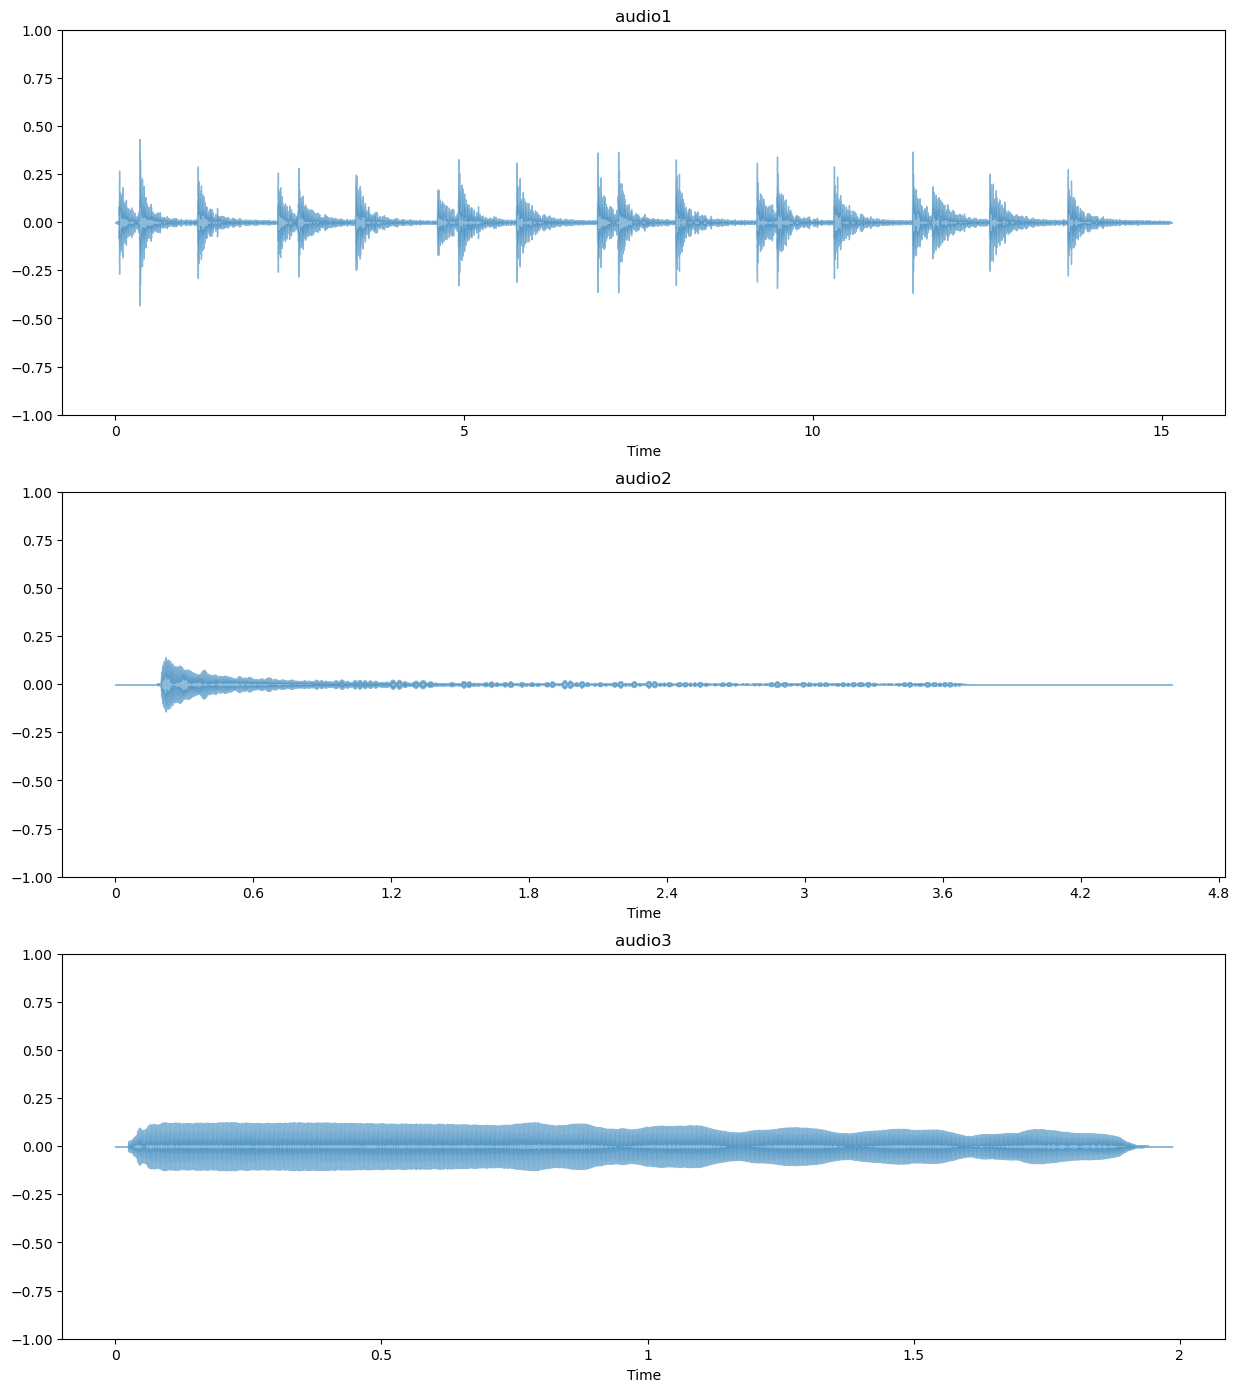

In [33]:
#visualize the waveform
import matplotlib.pyplot as plt
plt.figure(figsize=(15,17))

plt.subplot(3,1,1)
librosa.display.waveshow(audio_file1,alpha=0.5)
plt.title('audio1')
plt.ylim((-1,1))

plt.subplot(3,1,2)
librosa.display.waveshow(audio_file2,alpha=0.5)
plt.title('audio2')
plt.ylim((-1,1))

plt.subplot(3,1,3)
librosa.display.waveshow(audio_file3,alpha=0.5)
plt.title('audio3')
plt.ylim((-1,1))

plt.show()




In [105]:
FRAME_SIZE = 1024
HOP_LENGTH = 512
#calculate the amplitude envelope
def amplitude_envelope(signal,frame_size,hop_length):
    amplitude_envelope = []

    #calculate AE for each frame
    for i in range(0,len(signal),hop_length):
        current_frame_amplitude_envelop = max(signal[i:i+frame_size])
        amplitude_envelope.append(current_frame_amplitude_envelop)

    return np.array(amplitude_envelope)
        
def fancy_amplitude_envelope(signal,frame_size,hop_length):
    return np.array([max(signal[i:i+frame_size])for i in range(0,signal.size,hop_length)])

In [107]:
ae_audio1=amplitude_envelope(audio_file1,FRAME_SIZE,HOP_LENGTH)
len(ae_audio1)

653

In [101]:
fancy_ae_audio1=fancy_amplitude_envelope(audio_file1,FRAME_SIZE,HOP_LENGTH)

In [102]:
(ae_audio1==fancy_ae_audio1).all()

True

In [106]:
ae_audio2=amplitude_envelope(audio_file2,FRAME_SIZE,HOP_LENGTH)
ae_audio3=amplitude_envelope(audio_file3,FRAME_SIZE,HOP_LENGTH)

In [74]:
ae_audio1.size

653

In [78]:
type(t1)

numpy.ndarray

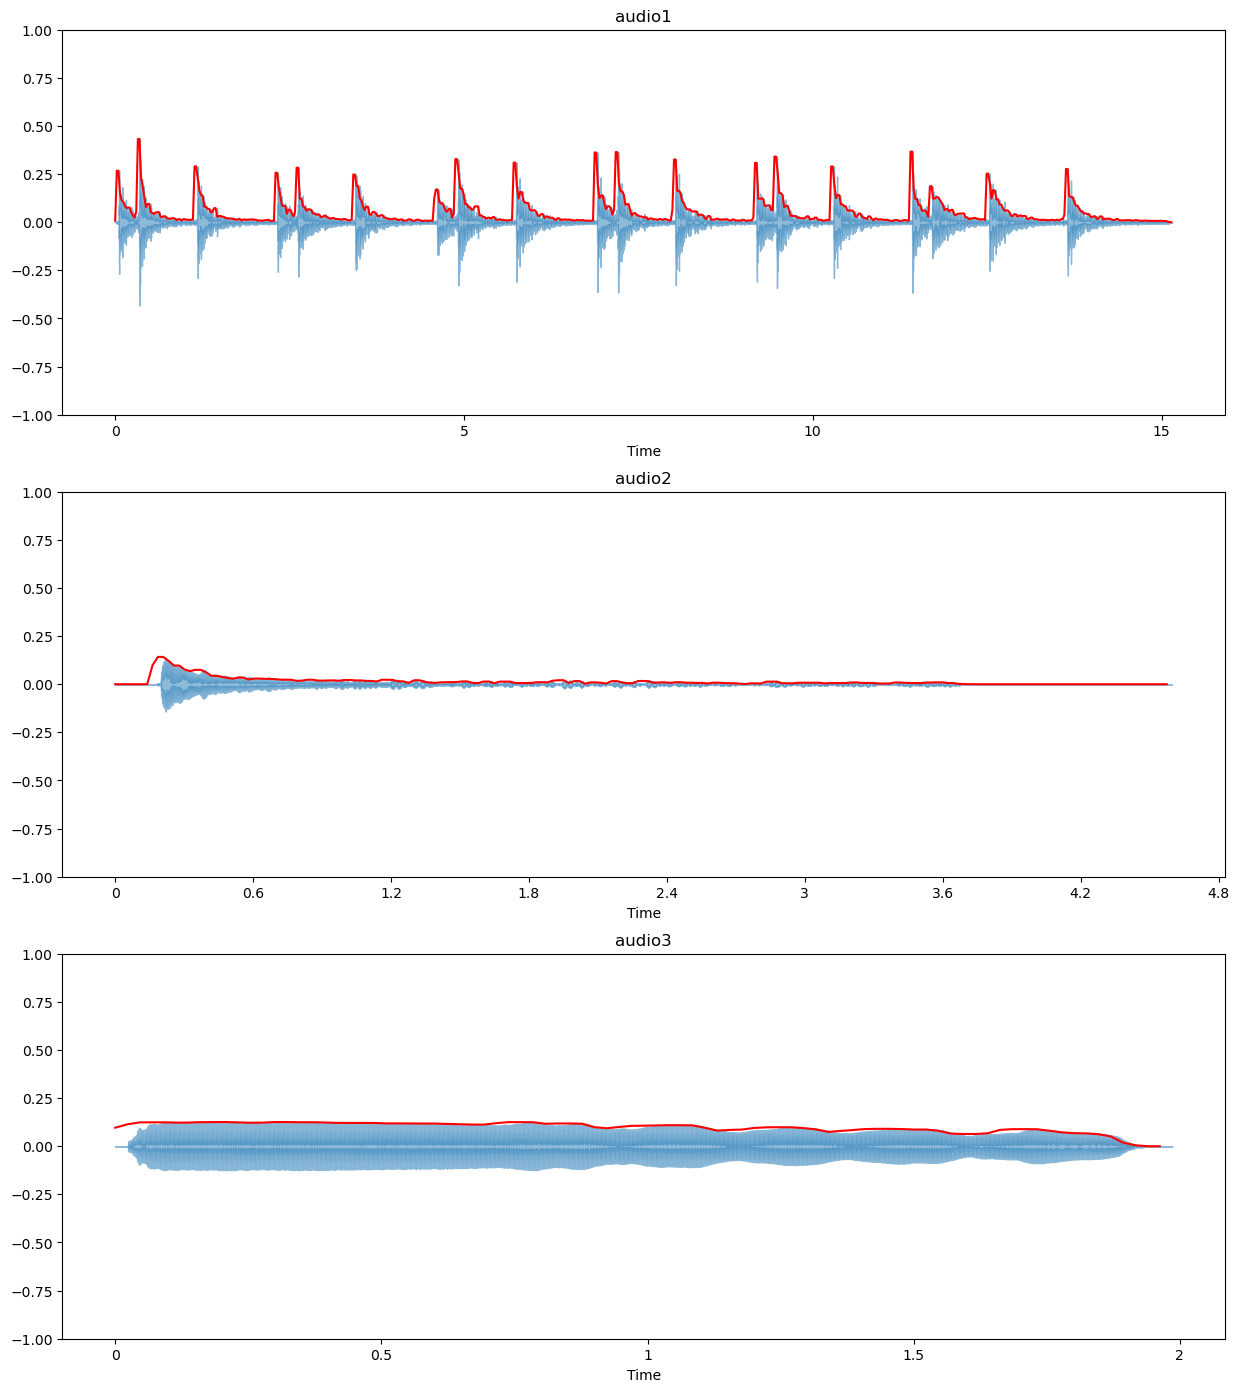

In [108]:
#Visulalize amplitude envelop for the audio files


frames1 = range(0,ae_audio1.size)
t1 = librosa.frames_to_time(frames1,hop_length=HOP_LENGTH)

frames2 = range(0,ae_audio2.size)
t2 = librosa.frames_to_time(frames2,hop_length=HOP_LENGTH)

t2_= np.array([duration2/len(frames2)*i for i in range(0,len(frames2))])


frames3 = range(0,ae_audio3.size)
t3 = librosa.frames_to_time(frames3,hop_length=HOP_LENGTH)
t3_= np.array([duration3/len(frames3)*i for i in range(0,len(frames3))])

plt.figure(figsize=(15,17))

plt.subplot(3,1,1)
librosa.display.waveshow(audio_file1,alpha=0.5)
plt.plot(t1,ae_audio1,color='r')
plt.title('audio1')
plt.ylim((-1,1))

plt.subplot(3,1,2)
librosa.display.waveshow(audio_file2,alpha=0.5)
plt.plot(t2_,ae_audio2,color='r')

plt.title('audio2')
plt.ylim((-1,1))

plt.subplot(3,1,3)
librosa.display.waveshow(audio_file3,alpha=0.5)
plt.plot(t3_,ae_audio3,color='r')

plt.title('audio3')
plt.ylim((-1,1))

plt.show()





